<a href="https://colab.research.google.com/github/Janhavi-Rajendra-Mahajan/Diasease-Prediction/blob/main/Diasease_Predictor_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jrm2005","key":"581647f6b1434c86d0552f144e7c2e1d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle


In [5]:
!kaggle kernels pull redwankarimsony/uci-heart-disease-eda-classification-analysis

Source code downloaded to /content/uci-heart-disease-eda-classification-analysis.ipynb


In [8]:
import pandas as pd
df = pd.read_csv('/content/heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv.csv')

In [35]:
df.head()

,num,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1
1,1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0
2,2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0
3,0,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0
4,4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0


In [9]:
print(df.columns)

Index(['num', 'age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'sex_Female', 'sex_Male',
       'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina'],
      dtype='object')


In [10]:
df.isnull().sum()

,0
num,0
age,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0
slope,0


In [11]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

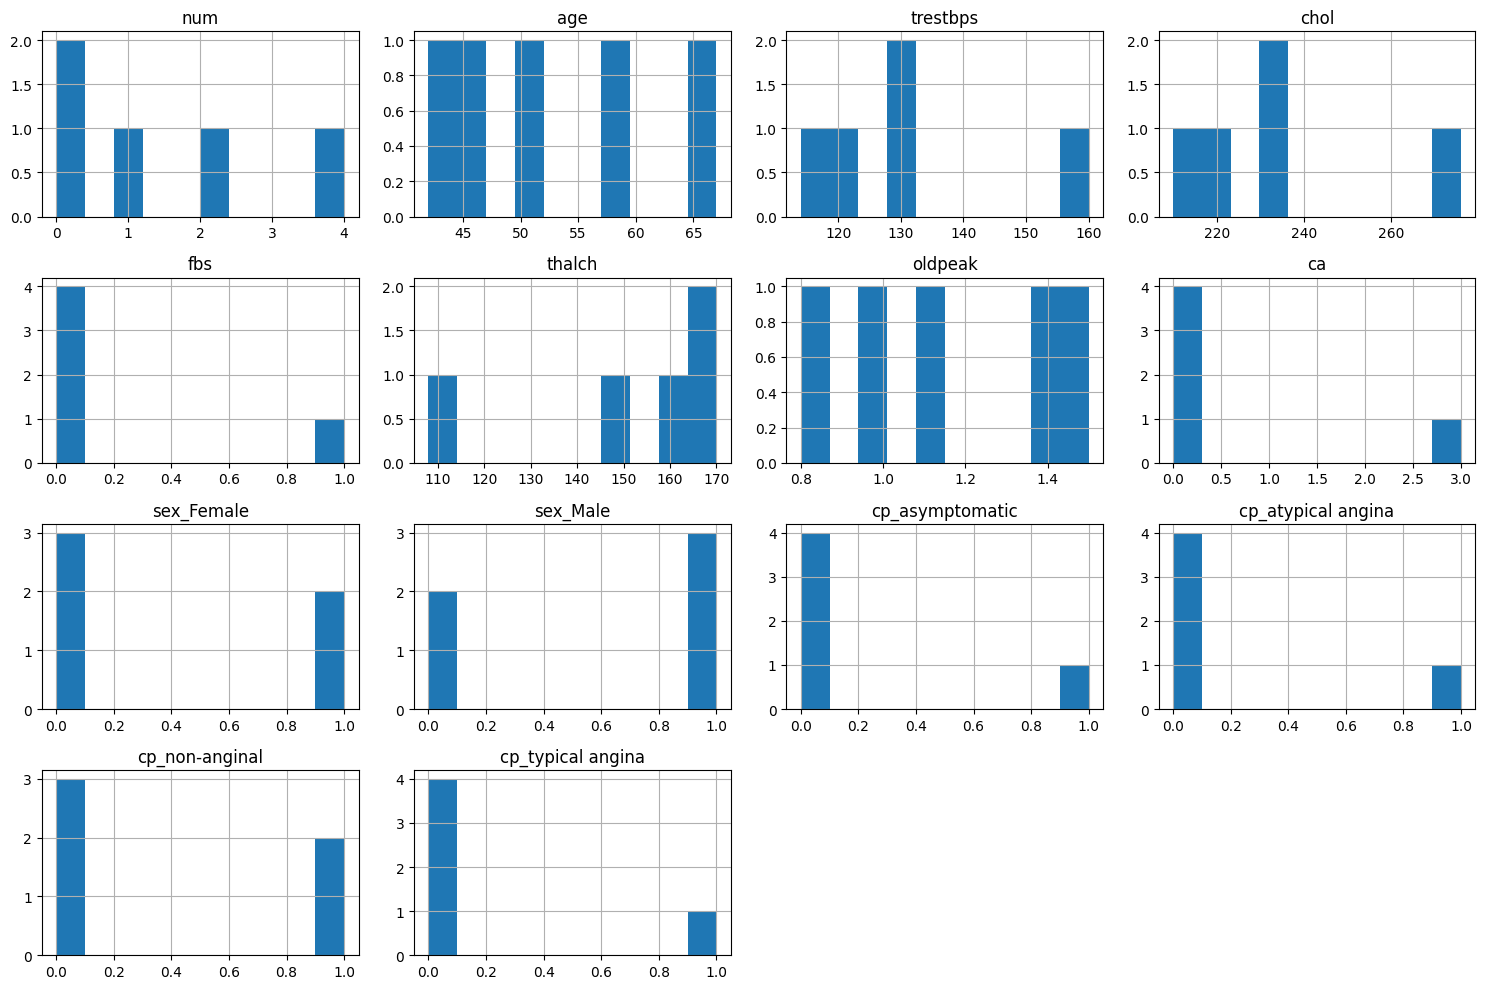

In [13]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

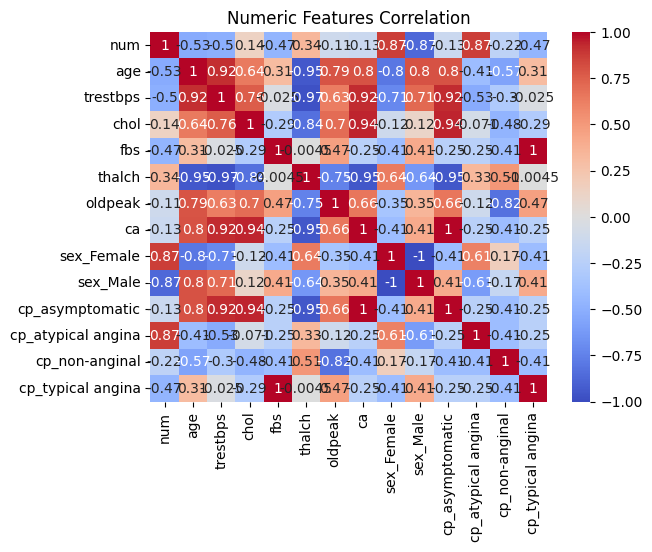

In [14]:
sns.heatmap(df[numeric_cols].corr(), annot=True,cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()

In [15]:
#Day 2 Model Training

In [16]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [17]:
X = df.drop('num',axis=1)    #1 taking here has a disease
y = (df['num']>0).astype(int) # 0 taking here no disease
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')
# One-hot encoding will now be applied in the train_test_split cell

In [18]:
# This step is not needed as the data is already preprocessed
print("Final feature columns:",X.columns)

Final feature columns: Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'sex_Female', 'sex_Male',
       'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina'],
      dtype='object')


In [19]:
#Day 3: Train/Test Split,Normalization,Modeling and Model Evaluation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop('num',axis=1)    #1 taking here has a disease
y = (df['num']>0).astype(int) # 0 taking here no disease

cat_cols = X.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True) # Apply one-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y, random_state=42)

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (3, 19)
Shape of y_train: (3,)
Shape of X_test_scaled: (2, 19)
Shape of y_test: (2,)


new value =(X-mean)/standard deviation

In [22]:
# Scaling is now done in the previous cell

In [23]:
from sklearn.linear_model import LogisticRegression #ts about Classification

In [24]:
lr_model = LogisticRegression() #giving admission to a new student
lr_model.fit(X_train_scaled,y_train) #training step

LogisticRegression()

**Model Evaluation**

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acuracy score - 75 to 98 considered to be good

Day 4:Random Forest,and Feature Importance

In [27]:
from sklearn.metrics import confusion_matrix

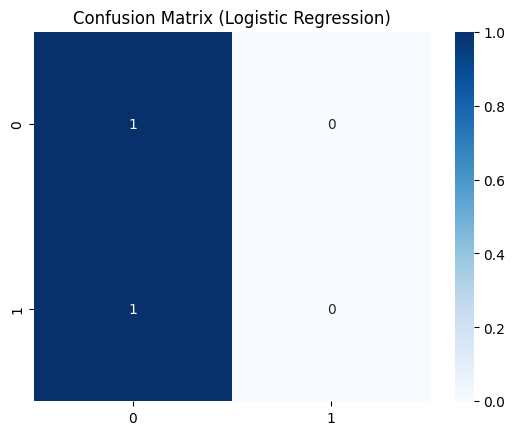

In [28]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [32]:
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.5


Feature Importance

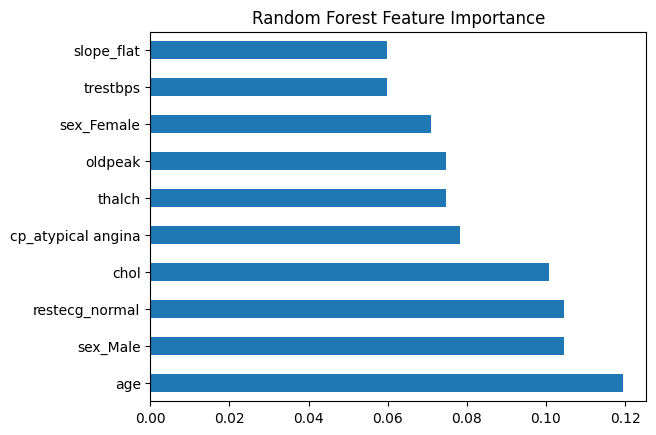

In [31]:
feat_imp = pd.Series(rf_model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

Save the Model

In [33]:
import joblib
joblib.dump(rf_model,'heart_rf_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [36]:
import joblib
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [37]:
sample = X.head(1)
sample.to_csv('Heart_user_template.csv',index=False)
print("User Template Saved as'Heart_user_template.csv'")

User Template Saved as'Heart_user_template.csv'


In [35]:
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

Day 05- User Upload & Prediction

In [38]:
from google.colab import files
files.upload()

Saving heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv.csv to heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv (1).csv


{'heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv (1).csv': b'num,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\r\n0,58,130,220,1,normal,150,FALSE,1.4,flat,0,fixed defect,0,1,0,0,0,1\r\n1,67,160,276,0,lv hypertrophy,108,TRUE,1.5,flat,3,normal,0,1,1,0,0,0\r\n2,42,120,230,0,normal,170,FALSE,1,upsloping,0,reversable defect,1,0,0,0,1,0\r\n0,50,130,210,0,lv hypertrophy,158,FALSE,0.8,flat,0,normal,0,1,0,0,1,0\r\n4,45,114,230,0,normal,165,FALSE,1.1,downsloping,0,normal,1,0,0,1,0,0'}

In [ ]:
import joblib
import pandas as pd
import io

# Load the trained model and scaler
try:
    model = joblib.load('heart_rf_model.pkl')
    scaler = joblib.load('heart_scaler.pkl')
except FileNotFoundError:
    print("Error: Model or scaler file not found. Please ensure the model and scaler are trained and saved.")
    # Exit or handle the error appropriately
    exit()

# Assume the user uploads a CSV file named 'user_heart_data.csv'
# You can modify this to match the actual uploaded filename if needed
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  user_df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))


# Preprocessing the user data
# Ensure the user data has the same columns and order as the training data before scaling
# We need the columns from the original training data (X) which was saved before splitting and scaling
# Assuming X from the training phase is available or can be recreated
# If X is not available, you would need to load a sample of the original processed data to get the column order

# Recreate X from the original df and one-hot encoding if needed
# Assuming df is still available from previous steps
X = df.drop('num', axis=1)
cat_cols = X.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


# Align columns - add missing columns with default value 0
user_df_aligned = user_df.reindex(columns=X.columns, fill_value=0)

# Ensure the order of columns in user_df_aligned is the same as X.columns
user_df_aligned = user_df_aligned[X.columns]

# Scale the user data
user_df_scaled = scaler.transform(user_df_aligned)

# Make prediction
preds = model.predict(user_df_scaled)

# Add prediction to the user DataFrame
user_df['Heart_Disease_Prediction'] = preds

# Show result
print("\nUser Data with Predictions:")
print(user_df)

Saving heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv.csv to heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv (1).csv
User uploaded file "heart_dataset - heart_dataset.csv - heart_dataset - heart_dataset.csv.csv (1).csv" with length 513 bytes

User Data with Predictions:
   num  age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0    0   58       130   220    1          normal     150  False      1.4   
1    1   67       160   276    0  lv hypertrophy     108   True      1.5   
2    2   42       120   230    0          normal     170  False      1.0   
3    0   50       130   210    0  lv hypertrophy     158  False      0.8   
4    4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1